In [17]:
import pandas as pd
import statsmodels.api as sm

___
# 1
Загрузите ряд и постройте его график.

In [3]:
milk = pd.read_csv(
    'data/monthly-milk-production.csv',
    sep=';',
    index_col=['month'],
    parse_dates=['month'],
    dayfirst=True)

In [10]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


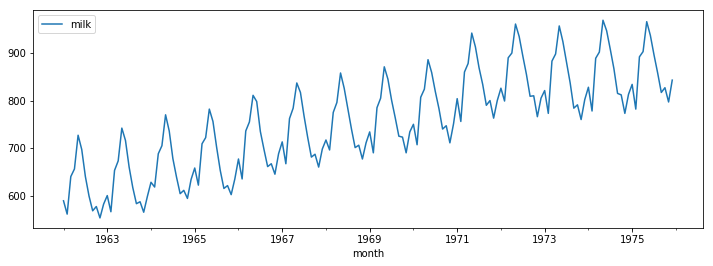

In [16]:
milk.plot(figsize=(12,4));

___
# 2
Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.

In [19]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

___
# 3
Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

In [21]:
milk.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='month', length=168)

In [22]:
milk['per_day'] = milk.milk / milk.index.days_in_month
milk.head()

,milk,per_day
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


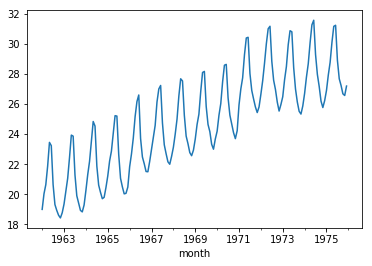

In [24]:
milk.per_day.plot();

In [25]:
milk.per_day.sum()

4166.326661899466